# Initialization

This notebook will train the Logistic Regression in **One vs Rest** decision function. The Multinomial Logistic Regression is in the Softmax Regression notebook

Connect to Google Drive:

In [58]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [60]:
X_train = X_train_bow
X_test = X_test_bow

# Basic training

In [21]:
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9848
	- Micro F1 score: 0.9848
	- Macro F1 score: 0.9816
Score of on test are:
	- Accuracy score: 0.8760
	- Micro F1 score: 0.8760
	- Macro F1 score: 0.8411


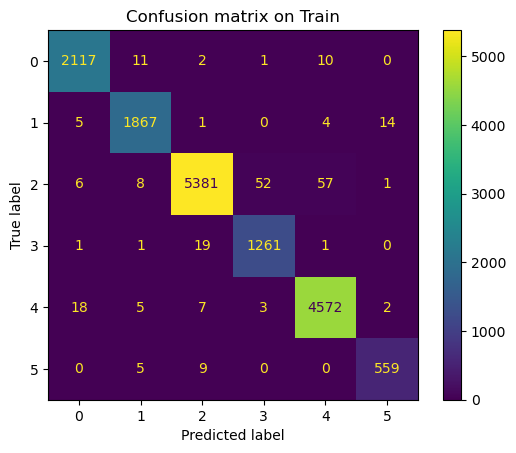

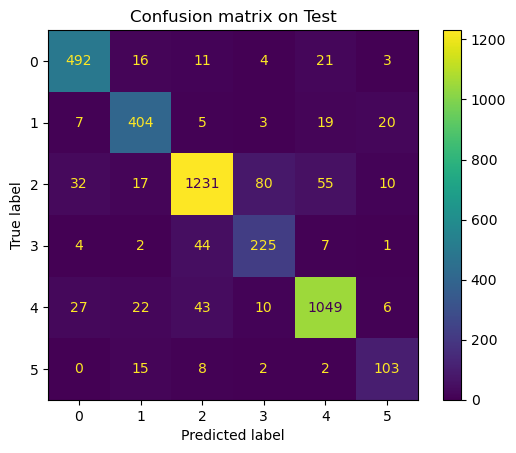

In [22]:
evaluate_model(lr_model, X_train, X_test, y_train, y_test, include_training=True)

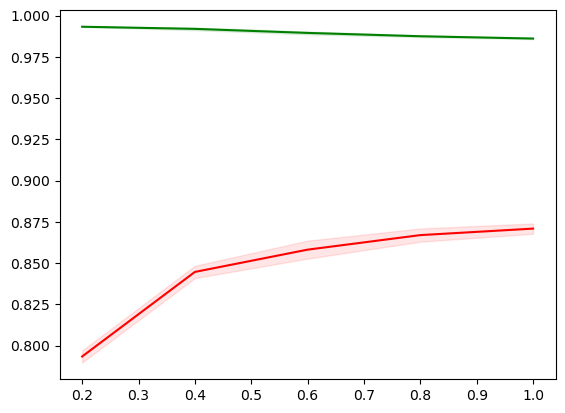

In [23]:
draw_learning_curve(lr_model, X_train, y_train)

# Multiple tuning

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [24]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3390625, 0.3388125, 0.864625, 0.926625, 0.991375, 0.9924375, 0.9926875]
[0.3368125, 0.3386875, 0.8408749999999999, 0.8725624999999999, 0.8686875000000001, 0.8680625, 0.8635624999999999]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

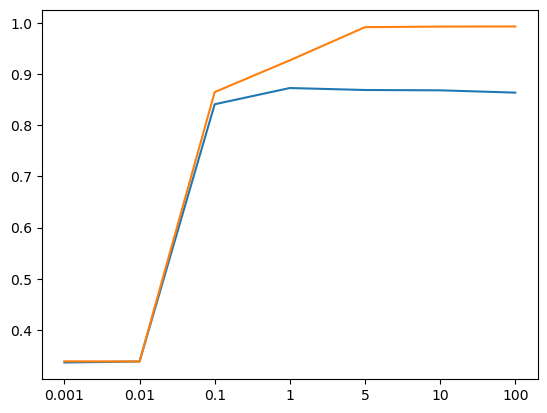

In [25]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 1$, then we scope to $C=1$:

In [26]:
C_list = [0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]
[0.864625, 0.88325, 0.8998125, 0.927, 0.939125, 0.953, 0.9664375, 0.984875]
[0.8407500000000001, 0.8659375, 0.8708750000000001, 0.8723749999999999, 0.8714375000000001, 0.8708125000000001, 0.8696249999999999, 0.8695625]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

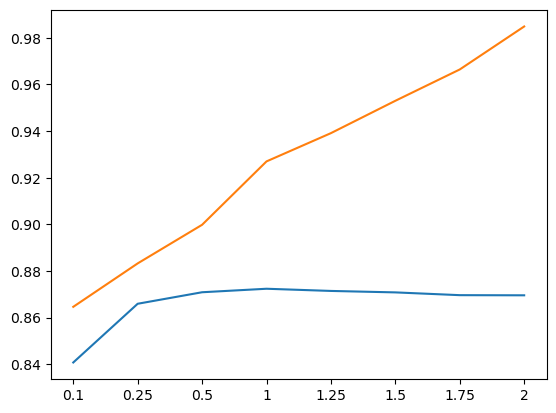

In [27]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1$ to be the best one

In [28]:
best_l1_lr_model = LogisticRegression(C=1, penalty='l1', solver='liblinear', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9267
	- Micro F1 score: 0.9267
	- Macro F1 score: 0.9077
Score of on test are:
	- Accuracy score: 0.8782
	- Micro F1 score: 0.8782
	- Macro F1 score: 0.8457


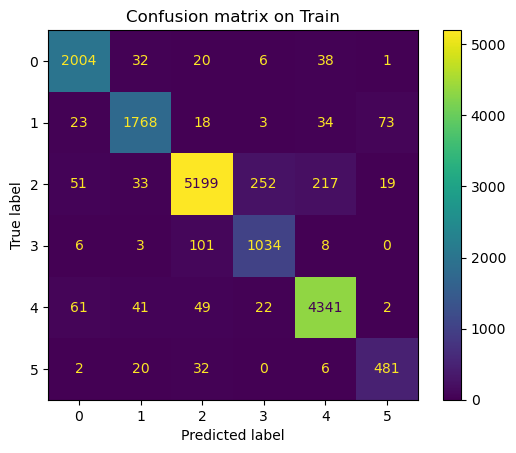

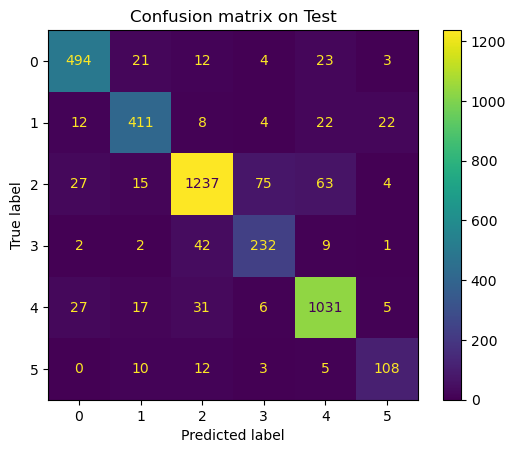

In [29]:
best_l1_lr_model.fit(X_train, y_train)
evaluate_model(best_l1_lr_model, X_train, X_test, y_train, y_test, include_training=True)

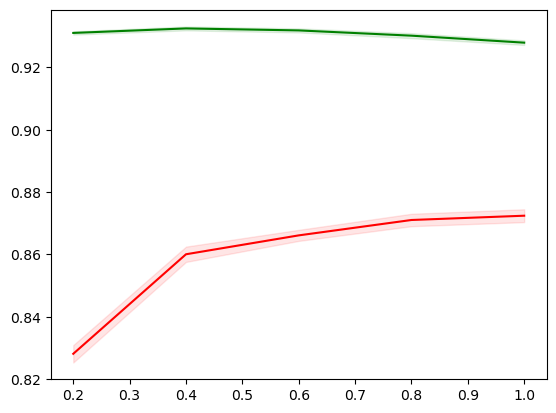

In [30]:
draw_learning_curve(best_l1_lr_model, X_train, y_train)

## L2 regularization

We do the same things from here

In [29]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3545, 0.6278125, 0.928, 0.9848125, 0.9916875, 0.9924375, 0.9926875]
[0.3431875, 0.5831875, 0.8396250000000001, 0.8709374999999999, 0.8725625000000001, 0.8714375000000001, 0.8636250000000001]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

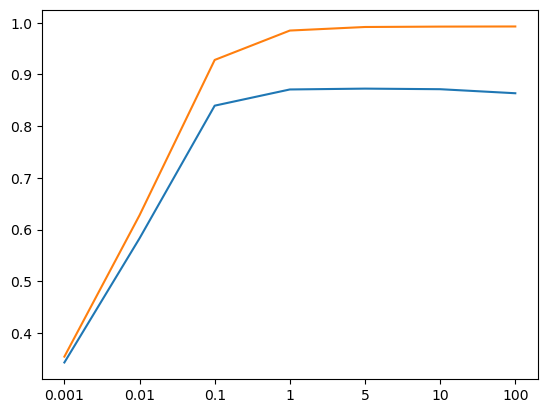

In [30]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

It looks like good $C$ is still near $1$

In [31]:
C_list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
[0.9606875, 0.97575, 0.981875, 0.9848125, 0.9866875, 0.98825, 0.988875, 0.9894375]
[0.8585, 0.8670000000000002, 0.8691875, 0.8709374999999999, 0.8712499999999999, 0.8717500000000001, 0.8720625, 0.8716250000000001]


[Text(0, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(2, 0, '0.75'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

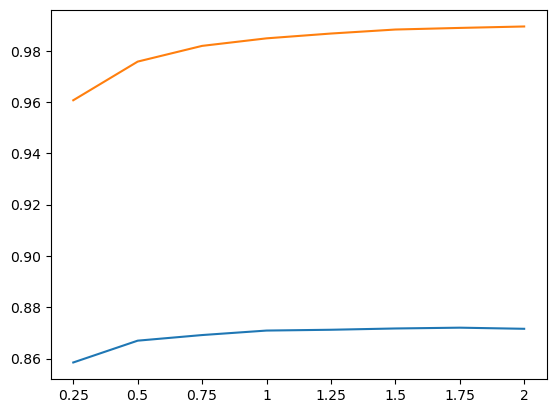

In [32]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1.75$

In [33]:
best_l2_lr_model = LogisticRegression(C=1.75, penalty='l2', solver='lbfgs', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9889
	- Micro F1 score: 0.9889
	- Macro F1 score: 0.9867
Score of on test are:
	- Accuracy score: 0.8770
	- Micro F1 score: 0.8770
	- Macro F1 score: 0.8419


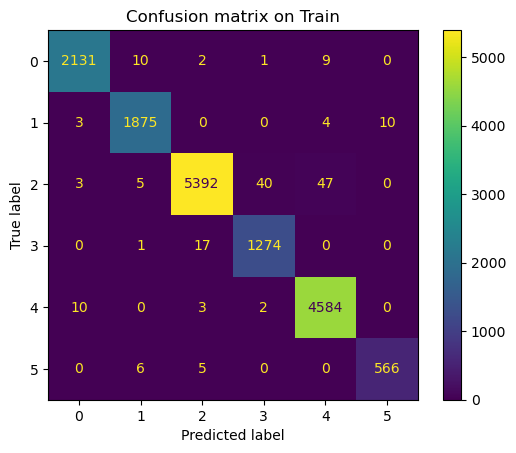

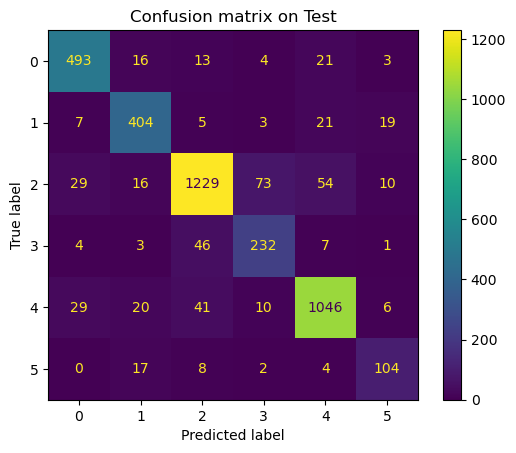

In [35]:
best_l2_lr_model.fit(X_train, y_train)
evaluate_model(best_l2_lr_model, X_train, X_test, y_train, y_test, include_training=True)

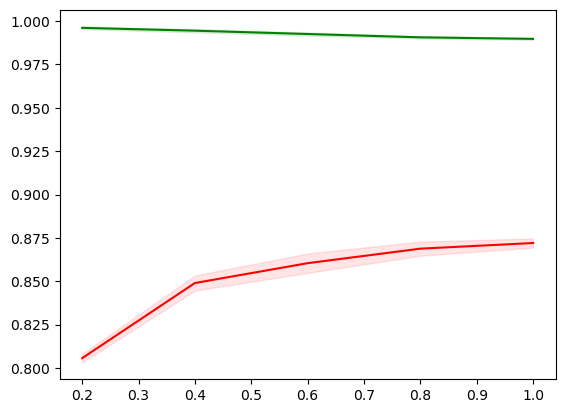

In [36]:
draw_learning_curve(best_l2_lr_model, X_train, y_train)

## Elastic regularization

In [43]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [46]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01


In [31]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [32]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.871063
1     1.000000       0.3  0.872437
2     1.000000       0.5  0.873688
3     1.000000       0.7  0.873250
4     1.000000       0.9  0.873937
5     3.162278       0.1  0.872125
6     3.162278       0.3  0.873375
7     3.162278       0.5  0.874188
8     3.162278       0.7  0.874313
9     3.162278       0.9  0.874375
10   10.000000       0.1  0.871813
11   10.000000       0.3  0.872750
12   10.000000       0.5  0.873625
13   10.000000       0.7  0.873625
14   10.000000       0.9  0.873562
15   31.622777       0.1  0.872500
16   31.622777       0.3  0.872437
17   31.622777       0.5  0.872375
18   31.622777       0.7  0.872188
19   31.622777       0.9  0.872687
20  100.000000       0.1  0.872062
21  100.000000       0.3  0.871937
22  100.000000       0.5  0.872375
23  100.000000       0.7  0.871687
24  100.000000       0.9  0.872125


In [33]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=3.1622776601683795, l1_ratio=0.9, multi_class='ovr',
                   penalty='elasticnet', solver='saga') 0.874375


In [61]:
best_en_lr_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

Score of on train are:
	- Accuracy score: 0.9756
	- Micro F1 score: 0.9756
	- Macro F1 score: 0.9701
Score of on test are:
	- Accuracy score: 0.8802
	- Micro F1 score: 0.8802
	- Macro F1 score: 0.8441


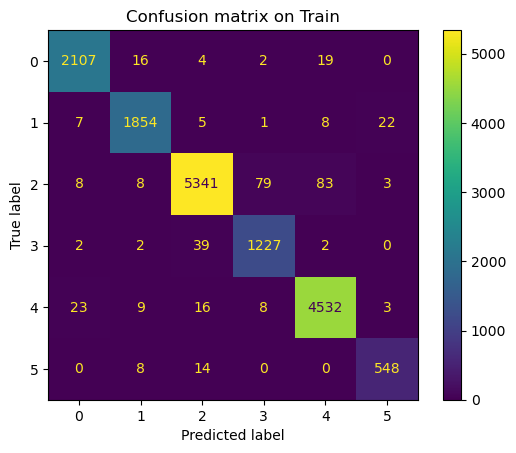

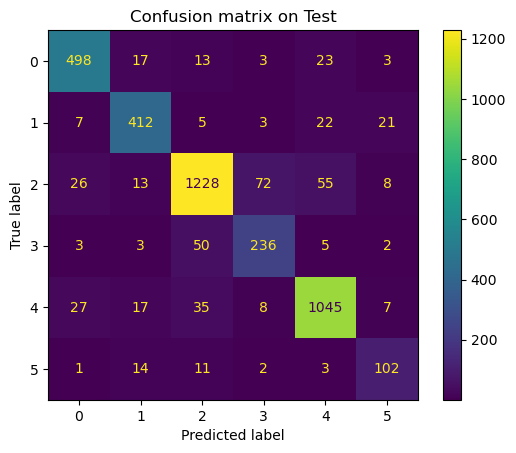

In [62]:
best_en_lr_model.fit(X_train, y_train)
evaluate_model(best_en_lr_model, X_train, X_test, y_train, y_test, include_training=True)

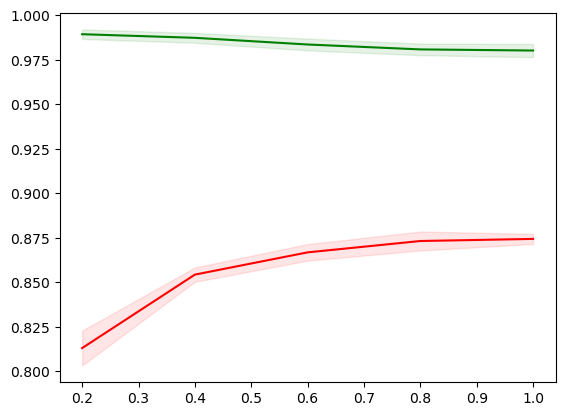

In [9]:
draw_learning_curve(best_en_lr_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [11]:
best_lr_model = best_en_lr_model

In [13]:
directory = "data/models/lr/"

dump(best_lr_model, directory + "best_lr_bow_model.joblib")

['data/models/lr/best_lr_bow_model.joblib']